# Python simulation framework - Parameter scan demo

-----------------------

## <span style="color:red">Note: This tutorial uses the same simulation, parameter and dose tables as defined in the [Simulation Tutorial](psf_simulations.ipynb)</span>.

----------------------------

### Import packages

In [1]:
# Import other Notebook functionality
from abm import *

# Also import other packages
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
import plotnine as p9

To demo these features, we will use an in-vivo single receptor binding model. We load this model and the simulation, parameter, and dose tables used in the simulation tutorial.

--------------

## Running parameter scans

### Scanning over various parameter values

Model parameter values can be varied from their nominal values by utilizing the `scan` argument to `simulate()`. The below example demonstrates how to scan the binding affinity parameter over values ranging from 0.1 nM to 10 nM. The function repeats all the simulations for each scan value.

In [2]:
# Filter to the strong binding strength and high receptor burden simulations to simplify the simulation set,
# since we'll be scanning over parameter values
Tsim = pd.read_csv("./tables/sim_table_psf.csv")
Tsim_strong_high = Tsim.query('binding_strength == "strong" & burden == "high"')

In [3]:
Tscan = simulate( 
    simulations = Tsim_strong_high,
    times = ["2:d"],
    parameters = "tables/par_table_psf.csv",
    doses = "tables/dose_table_psf.csv",
    models = 'model_files/antireceptor_model_1compartment-1.txt',
    outputs = ['cytokine_central_nM'],
    # The input argument `scans` lets you run multiple simulations with different values for parameters.
    # Use the `value_scan` function to specify which parameter(s) and what values to simulate.
    scans = value_scan(kd_mab = ["0.1:nM", "0.3:nM", "1:nM", "3:nM", "10:nM"])).to_pandas(tall_outputs = True)

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 0, Running: 0, Succeeded: 0, Failed: 0

To demonstrate how the scan results are stored, below the output table is converted to a Pandas DataFrame and displayed. Notice there are three columns associated with the scan: 

1. `param_scan_0` stores the name of the parameter being scanned
2. `scan_0_value` stores the value of the scanned parameter for this row's simulation
3. `scan_0_fold` stores the fold change of the scanned parameter relative to the nominal value for this row's simulation

This column structure makes it easy to use `plotnine` to create plots showing the impact of parameter scans.

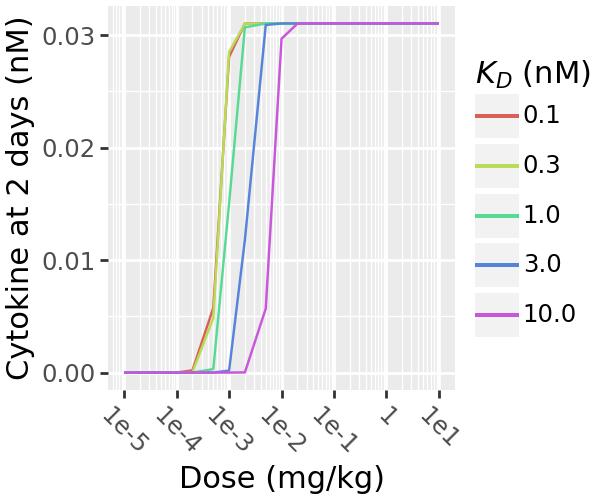

In [4]:
(
    p9.ggplot(Tscan, p9.aes('dose_mpk', 'value', color='factor(scan_0_value)'))
    + p9.geom_line()
    + p9.scale_x_log10(breaks = 10.0**np.arange(-5,2))
    + p9.labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
    + p9.theme(figure_size=(3,2.5), axis_text_x=p9.element_text(rotation=-45))
)

### Scanning over various parameter fold changes

To specify the fold changes in the parameter values relative to the nominal value listed in the parameter table, use the `fold_scan` function. The below example runs simulations increasing the $K_D$ value by amounts ranging from threefold to one hundredfold.

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 19, Running: 0, Succeeded: 19, Failed: 0

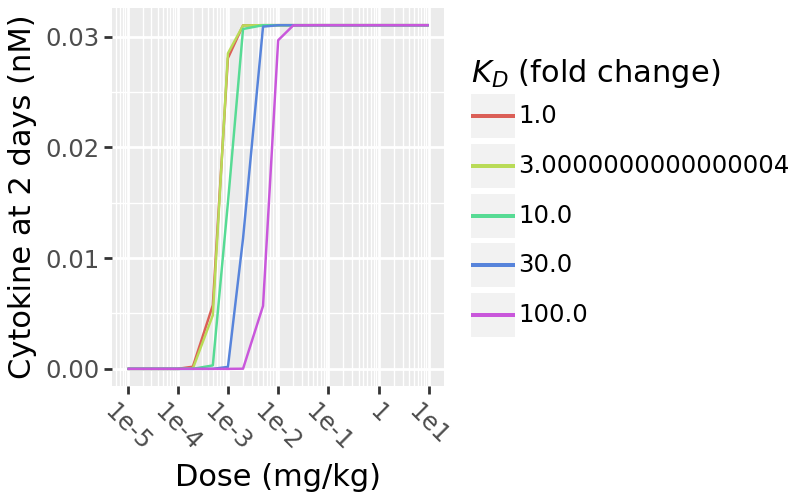

In [5]:
Tscan = simulate( 
    simulations = Tsim_strong_high,
    times = ['2:d'],
    parameters = "tables/par_table_psf.csv",
    doses = "tables/dose_table_psf.csv",
    models = 'model_files/antireceptor_model_1compartment-1.txt',
    outputs = ['cytokine_central_nM'],
    # Use the `fold_scan` function to specify which parameter(s) and what fold changes to simulate.
    scans = fold_scan(kd_mab = [1, 3, 10, 30, 100])).to_pandas(tall_outputs = True)

# Plotting shows the simulations are the same as before
(
    p9.ggplot(Tscan, p9.aes('dose_mpk', 'value', color='factor(scan_0_fold)'))
    + p9.geom_line()
    + p9.scale_x_log10(breaks = 10.0**np.arange(-5,2))
    + p9.labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (fold change)')
    + p9.theme(figure_size=(4,2.5), axis_text_x=p9.element_text(rotation=-45))
)

### Changing multiple parameters simultaneously

The `_0` term on the column names indicates the first of the scanned parameters. If we had scanned more parameters, additional pairs of columns would show up in the table with suffixes of `_1`, `_2`, and so on. To scan more parameters simultaneously, add more input arguments to `value_scan` or `fold_scan`. This is demonstrated below for `value_scan`.

In [6]:
Tscan = simulate( 
    simulations = Tsim_strong_high,
    times = ["2:d"],
    parameters = "tables/par_table_psf.csv",
    doses = "tables/dose_table_psf.csv",
    models = 'model_files/antireceptor_model_1compartment-1.txt',
    outputs = ['cytokine_central_nM'],
    # The input argument `scans` lets you run multiple simulations with different values for parameters.
    # Use the `value_scan` function to specify which parameter(s) and what values to simulate.
    scans = value_scan(kd_mab = ['0.1:nM', '1:nM', '10:nM'], R1_per_cell = [1e4, 1e6, 1e8])).to_pandas(tall_outputs = True)

with pd.option_context('display.max_rows',10): # prevents display of more than 10 rows
    display(Tscan)

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 38, Running: 0, Succeeded: 38, Failed: 0

,dose_mpk,binding_strength,burden,scan_0_type,scan_1_type,id,param_scan_0,scan_0_value,scan_0_fold,param_scan_1,scan_1_value,scan_1_fold,t,output,value,output_unit
0,0.00001,strong,high,value,value,0,kd_mab,0.1,1.0,R1_per_cell,10000.0,0.01,172800.0,cytokine_central_nM,8.854676e-11,nM
1,0.00001,strong,high,value,value,1,kd_mab,1.0,10.0,R1_per_cell,1000000.0,1.00,172800.0,cytokine_central_nM,5.824374e-16,nM
2,0.00001,strong,high,value,value,2,kd_mab,10.0,100.0,R1_per_cell,100000000.0,100.00,172800.0,cytokine_central_nM,1.000000e-16,nM
3,0.00002,strong,high,value,value,3,kd_mab,0.1,1.0,R1_per_cell,10000.0,0.01,172800.0,cytokine_central_nM,1.093203e-08,nM
4,0.00002,strong,high,value,value,4,kd_mab,1.0,10.0,R1_per_cell,1000000.0,1.00,172800.0,cytokine_central_nM,5.871400e-14,nM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,5.00000,strong,high,value,value,52,kd_mab,1.0,10.0,R1_per_cell,1000000.0,1.00,172800.0,cytokine_central_nM,3.104034e-02,nM
53,5.00000,strong,high,value,value,53,kd_mab,10.0,100.0,R1_per_cell,100000000.0,100.00,172800.0,cytokine_central_nM,3.104043e-02,nM
54,10.00000,strong,high,value,value,54,kd_mab,0.1,1.0,R1_per_cell,10000.0,0.01,172800.0,cytokine_central_nM,3.104044e-02,nM
55,10.00000,strong,high,value,value,55,kd_mab,1.0,10.0,R1_per_cell,1000000.0,1.00,172800.0,cytokine_central_nM,3.104042e-02,nM


To visualize the results, the below code plots each of the scan parameter sets on a different subplot. Note that the parameters are varied together (resulting in only three simulations) and not in all their combinations (which would have resulted in nine simulations).

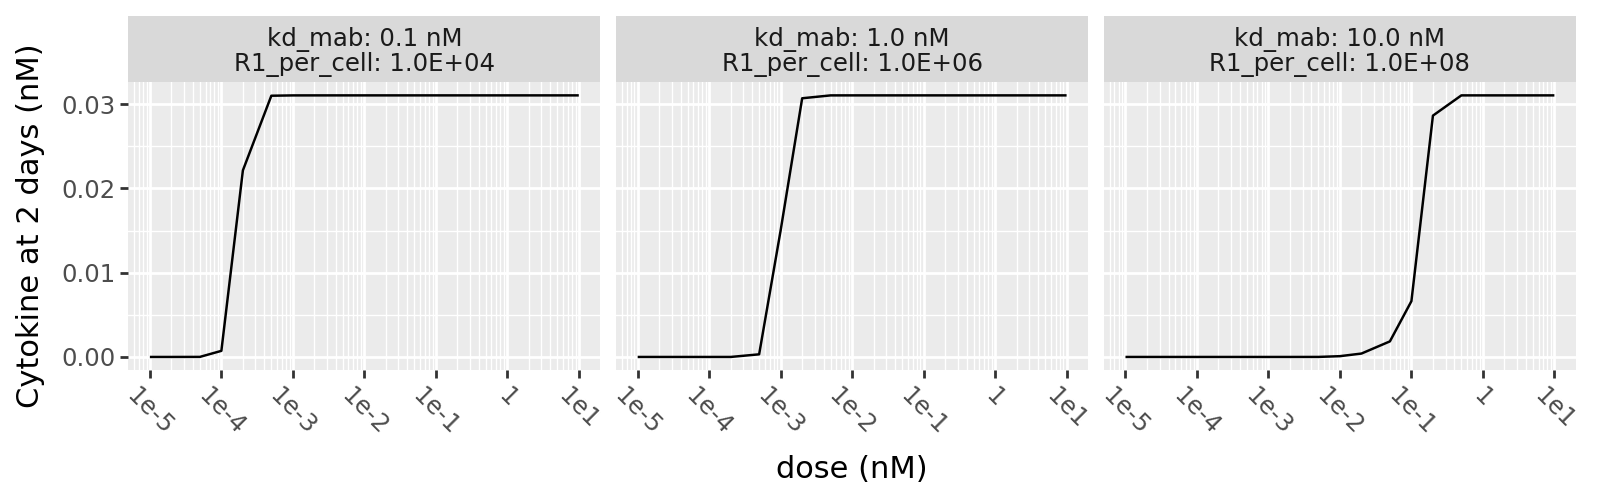

In [7]:
Tplot = Tscan.copy()

# Set up nice labels for subplots
Tplot['subplot_label'] = [f"kd_mab: {kd} nM\nR1_per_cell: {r:.1E}" # ':.1E' formats values in scientific notation and one decimal place
                          for kd,r in zip(Tplot.scan_0_value, Tplot.scan_1_value)]

(
    p9.ggplot(Tplot, p9.aes('dose_mpk', 'value'))
    + p9.geom_line()
    + p9.facet_wrap('~ subplot_label')
    + p9.scale_x_log10(breaks = 10.0**np.arange(-5,2))
    + p9.labs(x = 'dose (nM)', y = 'Cytokine at 2 days (nM)')
    + p9.theme(figure_size = (8,2.5), axis_text_x=p9.element_text(rotation=-45))
)

### Sequential scans

To simulate scans sequentially, you can add scans together. This is useful for scanning multiple parameters one at a time. See below for an example.

In [8]:
Tscan = simulate( 
    simulations = Tsim_strong_high,
    times = ["2:d"],
    parameters = "tables/par_table_psf.csv",
    doses = "tables/dose_table_psf.csv",
    models = 'model_files/antireceptor_model_1compartment-1.txt',
    outputs = ['cytokine_central_nM'],
    # The input argument `scans` lets you run multiple simulations with different values for parameters.
    # Use the `value_scan` function to specify which parameter(s) and what values to simulate.
    scans = (value_scan(kd_mab = ['0.1:nM', '1:nM', '10:nM']) +
             value_scan(R1_per_cell = [1e4, 1e6, 1e8]))).to_pandas(tall_outputs = True)


/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 19, Running: 0, Succeeded: 19, Failed: 0

Each of the sequential scans can be plotted in a separate subplot by using the `facet_wrap` function of `plotnine`, as shown below.

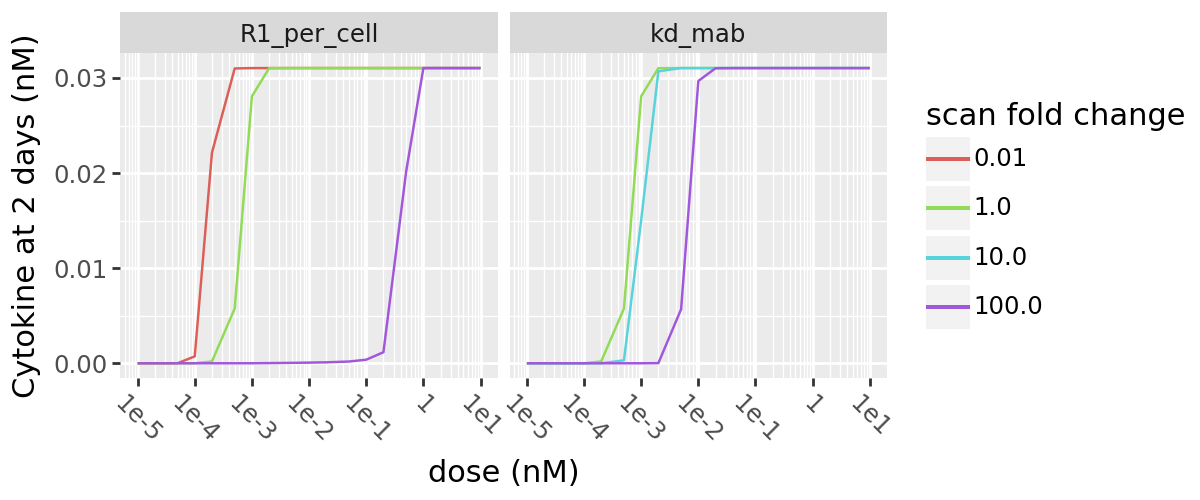

In [9]:
(
    p9.ggplot(Tscan, p9.aes('dose_mpk', 'value', color='factor(scan_0_fold)'))
    + p9.geom_line()
    # facet_wrap makes a subplot for each value in some column -- here, for scan_parameter_0
    + p9.facet_wrap('~ param_scan_0')
    + p9.scale_x_log10(breaks = 10.0**np.arange(-5,2))
    + p9.labs(x = 'dose (nM)', y = 'Cytokine at 2 days (nM)', color = 'scan fold change')
    + p9.theme(figure_size = (6,2.5), axis_text_x=p9.element_text(rotation=-45))
)

### Grid scans

To simulate all possible combinations of parameters, multiply scans together. This is useful for grid scans. 

In the example below, we generate a heat map plotting how the KD and receptor expression together impact what drug concentration results in 50% RO at day 2. First we run the simulations to generate a data table of RO values at day 2.

In [10]:
Tscan = simulate( 
    simulations = Tsim_strong_high,
    times = ["2:d"],
    parameters = "tables/par_table_psf.csv",
    doses = "tables/dose_table_psf.csv",
    models = 'model_files/antireceptor_model_1compartment-1.txt',
    outputs = ['receptor_occupancy'],
    # The input argument `scans` lets you run multiple simulations with different values for parameters.
    # Use the `value_scan` function to specify which parameter(s) and what values to simulate.
    scans = value_scan(kd_mab = ["0.1:nM", "0.3:nM", "1:nM", "3:nM", "10:nM"]) * value_scan(R1_per_cell = [1e3, 1e4, 1e5, 1e6, 1e7])
).to_pandas(tall_outputs = True)

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 475, Running: 0, Succeeded: 475, Failed: 0

In [11]:
Tscan.head()

,dose_mpk,binding_strength,burden,scan_0_type,scan_1_type,id,param_scan_0,scan_0_value,scan_0_fold,param_scan_1,scan_1_value,scan_1_fold,t,output,value,output_unit
0,0.00001,strong,high,value,value,0,kd_mab,0.1,1.0,R1_per_cell,1000.0,0.001,172800.0,receptor_occupancy,3.024455e-01,1
1,0.00001,strong,high,value,value,1,kd_mab,0.1,1.0,R1_per_cell,10000.0,0.010,172800.0,receptor_occupancy,2.974294e-01,1
2,0.00001,strong,high,value,value,2,kd_mab,0.1,1.0,R1_per_cell,100000.0,0.100,172800.0,receptor_occupancy,2.516825e-01,1
3,0.00001,strong,high,value,value,3,kd_mab,0.1,1.0,R1_per_cell,1000000.0,1.000,172800.0,receptor_occupancy,4.867278e-02,1
4,0.00001,strong,high,value,value,4,kd_mab,0.1,1.0,R1_per_cell,10000000.0,10.000,172800.0,receptor_occupancy,4.642953e-07,1


We then calculate the drug concentration achieving 50% RO for each of the scans.

In [12]:
T50 = (
    Tscan
    # Keep simulations with more than 50% RO at day 2
    .query('value > 50')
    # Group by KD/R combinations (the scan parameters)
    .groupby(['scan_0_value', 'scan_1_value'])
    # In each group, the 50% RO concentration is the smallest of the remaining concentrations
    .agg(RO50_dose = ("dose_mpk","min"))
).reset_index()

A heat map plot is easy to generate in `plotnine`.

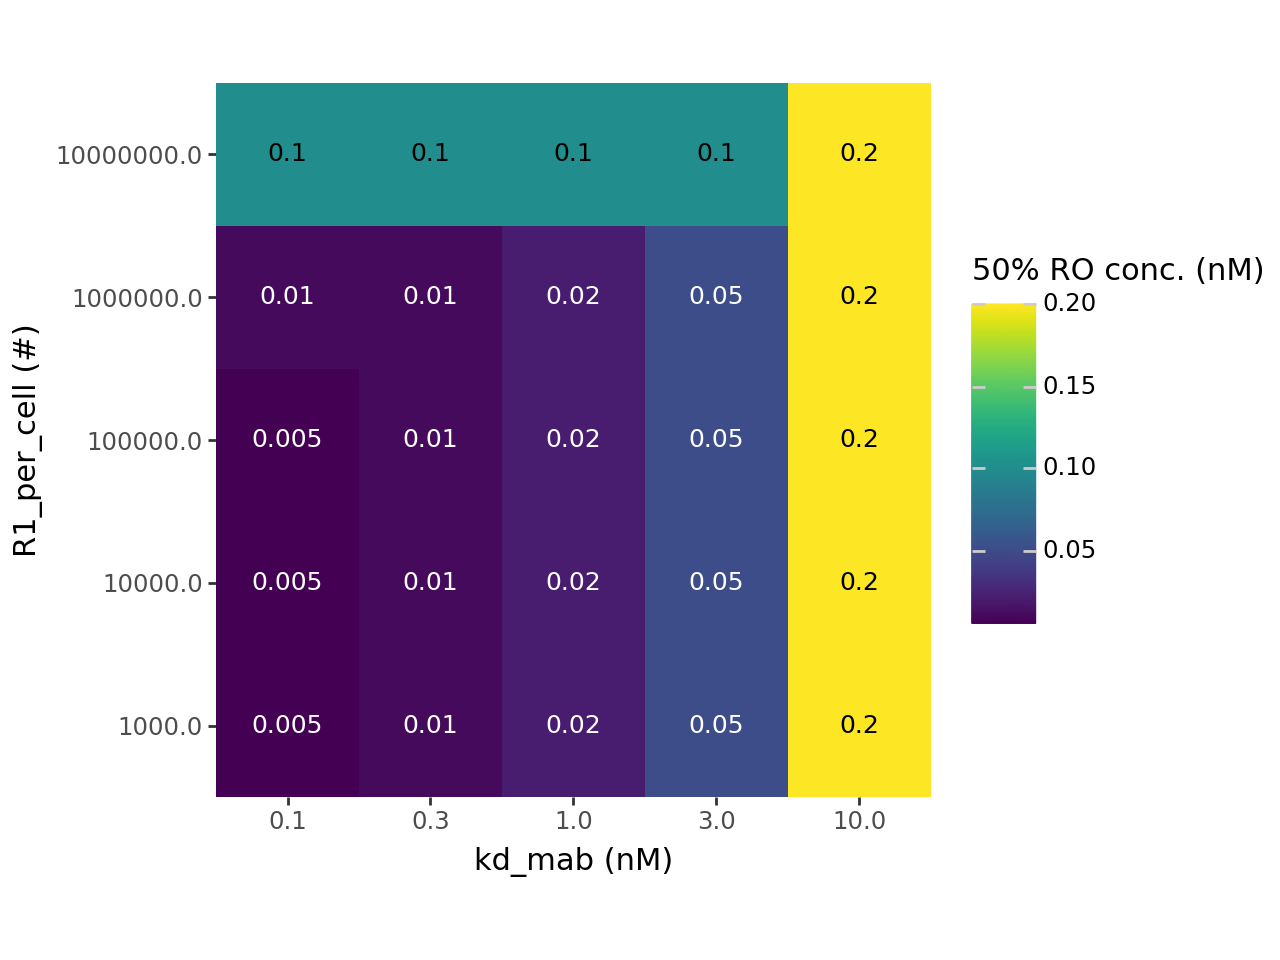

In [13]:
# To improve contrast between the tiles and the text, we use pd.cut(column for heatmap, bin values (e.g. lowest, median, high)) 
# to partition the number of the RO50_dose into two discrete groups. 
T50['label_color'] = pd.cut(T50['RO50_dose'], (0, T50.RO50_dose.median(),1)) 

(
    p9.ggplot(T50, p9.aes(x='factor(scan_0_value)', y='factor(scan_1_value)', fill='RO50_dose'))
    + p9.geom_tile()
    + p9.geom_text(p9.aes(label='RO50_dose', color='factor(label_color)'), size=9, show_legend=False)  
    + p9.scale_color_manual(['white', 'black']) #color of the text
    + p9.coord_equal(expand=False)
    + p9.labs(x='kd_mab (nM)', y='R1_per_cell (#)', fill='50% RO conc. (nM)')
)